In [1]:
!pip install graphviz

In [2]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
import multiprocessing

from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz,export_text, plot_tree

from sklearn import metrics
import graphviz

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 결정 트리(Decision Tree)

* 분류와 회귀에 사용되는 지도 학습 방법
* 데이터 특성으로 부터 추론된 결정 규칙을 통해 값을 예측
* **if-then-else** 결정 규칙을 통해 데이터 학습
* 트리의 깊이가 깊을 수록 복잡한 모델
* 결정 트리 장점
  * 이해와 해석이 쉽다
  * 시각화가 용이하다
  * 많은 데이터 전처리가 필요하지 않다
  * 수치형과 범주형 데이터 모두를 다룰 수 있다

### 지니계수를 이용하여 데이터를 분할
- 지니계수 : 경제학에서 불평등지수를 나타낼 때 사용하는 것으로 0일 때 완전 평등, 1일 때 완전 불평등을 의미
- 머신러닝에서는 데이터가 다양한 값을 가질수록 평등하며 특정 값으로 쏠릴 때 불평등한 값이 됩니다.
- 다양성이 낮을수록 균일도가 높다는 의미로 1로 갈수록 균일도가 높아 지니계수가 높은 속성을 기준으로 분할

### Decision Tree Classifier의 파라미터

#### 핵심 파라미터

##### min_samples_split	: 노드를 분할하기 위한 최소한의 샘플 데이터수 
( 과적합을 제어하는데 사용 )
- Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가<br>
##### min_samples_leaf: 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수
- min_samples_split과 함께 과적합 제어 용도<br>
- 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요<br>
##### max_features: 최적의 분할을 위해 고려할 최대 feature 개수<
- Default = None → 데이터 세트의 모든 피처를 사용<br>
- int형으로 지정 →피처 갯수 / float형으로 지정 →비중<br>
- sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정<br>
- log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정<br>
##### max_depth	: 트리의 최대 깊이<br>
- default = None<br>
→ 완벽하게 클래스 값이 결정될 때 까지 분할<br>
또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할<br>
- 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요<br>
##### max_leaf_nodes:	리프노드의 최대 개수<br>

In [3]:
iris = load_iris()

In [4]:
iris_df = pd.DataFrame( iris.data)
iris_df.columns = iris['feature_names']
iris_df['specis'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specis
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
x_data = iris['data']
y_data = iris['target']

In [6]:
x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.2,
                                                   stratify=y_data, random_state=1)

In [7]:
model_tree = DecisionTreeClassifier(criterion="entropy")
model_tree.fit( x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [8]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

https://www2.graphviz.org/Packages/stable/windows/10/msbuild/Release/Win32/

In [10]:
import os
os.environ['PATH']+= os.pathsep+r'C:\Program Files\graphviz-2.44.1-win32\Graphviz\bin'

In [11]:
export_graphviz( model_tree, out_file='tree.dot', 
                class_names=iris['target_names'], feature_names=iris['feature_names'] )

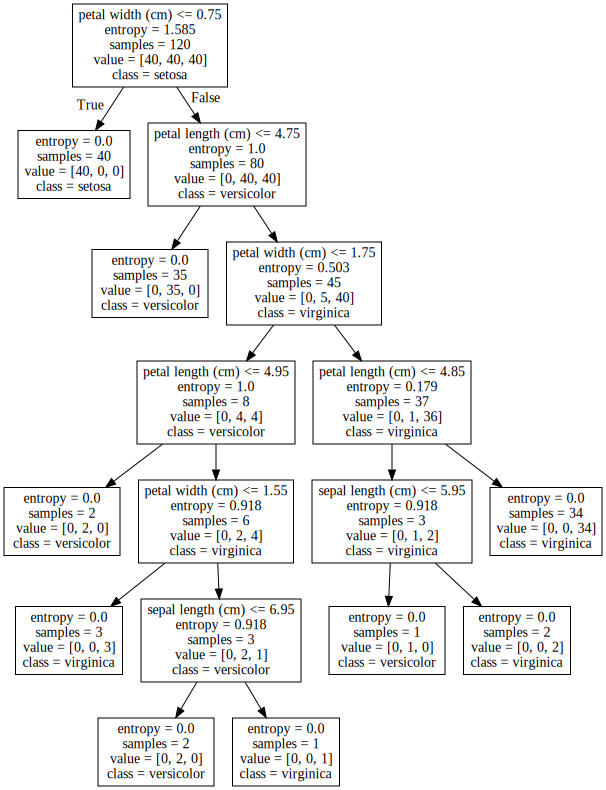

In [12]:
fp = open('tree.dot')
dot_graph = fp.read()
graphviz.Source( dot_graph)

In [13]:
model_tree.score( x_train, y_train)

1.0

In [14]:
model_tree.score( x_test, y_test)

0.9666666666666667

In [15]:
model_tree.feature_importances_

array([0.02896901, 0.        , 0.33502994, 0.63600105])

In [16]:
import seaborn as sns

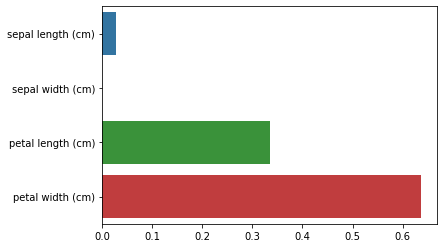

In [17]:
sns.barplot( x=model_tree.feature_importances_, y=iris['feature_names'])
plt.show()

# 과적합확인

In [18]:
from sklearn.model_selection import validation_curve

In [19]:
pip_tree = make_pipeline( DecisionTreeClassifier(criterion='entropy') )

In [20]:
param_range = [2,3,4,5,6,7,8,9,10] # range( 2,11)

In [22]:
train_score, test_score = validation_curve( estimator=pip_tree, X=x_train, y=y_train, 
                    param_name='decisiontreeclassifier__max_depth',
                param_range=param_range, scoring='f1_macro', cv =5, verbose=1 )

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.0s finished


In [29]:
train_score

array([[0.96868118, 0.95816993, 0.9582926 , 0.96868118, 0.96874237],
       [0.96868118, 0.95816993, 0.96874237, 0.9791463 , 0.9791463 ],
       [0.98958079, 0.97916667, 0.98958079, 1.        , 0.98958079],
       [1.        , 0.98958079, 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ]])

In [30]:
test_score

array([[0.91534392, 0.95816993, 0.95816993, 0.91666667, 0.91666667],
       [0.8745098 , 0.95816993, 0.95816993, 0.95816993, 0.95816993],
       [0.91666667, 0.95816993, 1.        , 0.91666667, 0.95816993],
       [0.91666667, 0.95816993, 1.        , 0.91666667, 0.95816993],
       [0.91666667, 0.95816993, 0.95816993, 0.91666667, 0.95816993],
       [0.91666667, 0.95816993, 0.95816993, 0.91666667, 0.95816993],
       [0.91666667, 0.95816993, 0.95816993, 0.91666667, 0.95816993],
       [0.91666667, 0.95816993, 0.95816993, 0.91666667, 0.95816993],
       [0.91666667, 0.95816993, 1.        , 0.91666667, 0.95816993]])

In [24]:
train_score.mean(axis=1)

array([0.96451346, 0.97077722, 0.98958181, 0.99791616, 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [26]:
test_score.mean( axis=1)

array([0.93300342, 0.94143791, 0.94993464, 0.94993464, 0.94156863,
       0.94156863, 0.94156863, 0.94156863, 0.94993464])

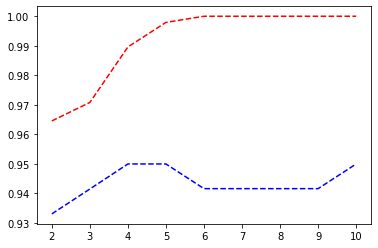

In [28]:
plt.plot( param_range, train_score.mean( axis=1), 'r--')
plt.plot( param_range, test_score.mean( axis=1), 'b--')
plt.show()

$$
\begin{align}
H[Y] = -\sum_{k=1}^K p(y_k) \log_2 p(y_k)
\tag{1}
\end{align}
$$

한 영역 안에 존재하는 데이터 가운데 
범주 i에 속하는 데이터의 비율

In [ ]:
DecisionTreeClassifier(random_state=0)